# **M22: Near-future assessment of dry spells across Africa under SSP5-8.5**

In [61]:
import xarray as xr

In [62]:
import seaborn as sns

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Finding the Monthly Average For 5, 10, 15 and 20 day dry spells in West Africa**


In [84]:
import xarray as xr

# Open the input NetCDF file
ds = xr.open_dataset('drive/MyDrive/afonly.nc')

# Select the sub-region of interest
lon_range = slice(-16, 18)  # longitude range from 22ºE to 51ºE
lat_range = slice(4, 19)  # latitude range from 12ºS to 23ºN
subset = ds.sel(lon=lon_range, lat=lat_range)

# Write the subset to a new NetCDF file
subset.to_netcdf('west.nc')

In [85]:
# Open the netCDF file and convert the precipitation data into daily values
ds_data = xr.open_dataset('west.nc')
da_RR = ds_data['pr'].values * 86400
da_RR = xr.DataArray(da_RR, dims=('time', 'lat', 'lon'), coords={'time': ds_data.time, 'lat': ds_data.lat, 'lon': ds_data.lon})

In [86]:
# Define the dry_spell() function and call it
def dry_spell(data, window=5, Rday_thresh=1, dim='time'):
    rolling_sums = data.rolling(time=window).sum()

    dry_day_count = data.where(data < Rday_thresh).rolling(time=window).count()
    spells = data.where((rolling_sums < window*Rday_thresh) & (dry_day_count == window))
    return spells

In [87]:
# Calculate the dry spells for different window sizes
spells_5_west = dry_spell(da_RR, window=5, Rday_thresh=1, dim='time')
spells_10_west = dry_spell(da_RR, window=10, Rday_thresh=1, dim='time')
spells_15_west = dry_spell(da_RR, window=15, Rday_thresh=1, dim='time')
spells_20_west = dry_spell(da_RR, window=20, Rday_thresh=1, dim='time')

In [88]:
%%time
# Count the number of dry spells per year using groupby
spells_5_count = spells_5.groupby('time.year').count(dim='time')
spells_10_count = spells_10.groupby('time.year').count(dim='time')
spells_15_count = spells_15.groupby('time.year').count(dim='time')
spells_20_count = spells_20.groupby('time.year').count(dim='time')

CPU times: user 237 ms, sys: 1.02 ms, total: 238 ms
Wall time: 254 ms


In [89]:
def spell_count_M_West(data):
    spell_count_M_West = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_count_M_West = spell_count_M_West.to_dataframe(name='data')
    spell_count_M_West['Date'] = pd.to_datetime(spell_count_M_West.index.get_level_values('time'))
    spell_count_M_West['Year'] = spell_count_M_West['Date'].dt.year
    spell_count_M_West['Month'] = spell_count_M_West['Date'].dt.month
    spell_count_M_West = spell_count_M_West.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_count_M_West.columns = month_names

    return spell_count_M_West

  # Call the functions with your data
result_5 = spell_count_M_West(spells_5_west)
result_10 = spell_count_M_West(spells_10_west)
result_15 = spell_count_M_West(spells_15_west)
result_20 = spell_count_M_West(spells_20_west)

<function __main__.spell_5_count_M(data)>

Text(0.5, 0.98, 'West Africa Monthly Spell Counts')

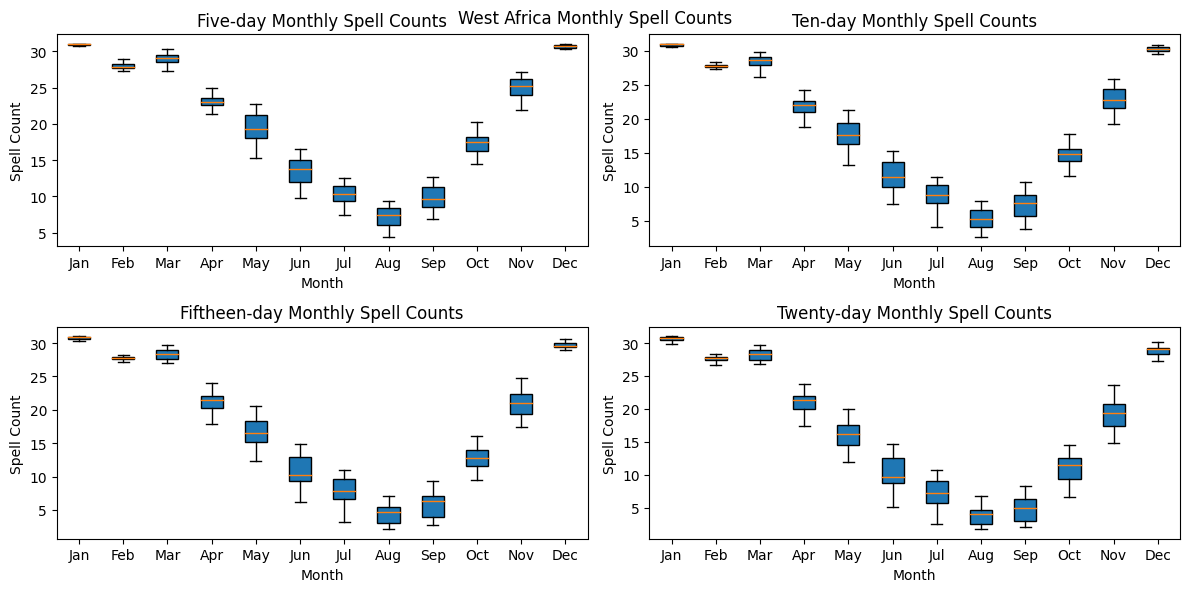

In [90]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot result_5
axes[0,0].boxplot(result_5, showfliers=False, patch_artist=True, labels=month_names)
axes[0,0].set_title('Five-day Monthly Spell Counts')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Spell Count')

# Plot result_10
axes[0,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[0,1].set_title('Ten-day Monthly Spell Counts')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Spell Count')

# Plot result_15
axes[1,0].boxplot(result_15.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,0].set_title('Fiftheen-day Monthly Spell Counts')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Spell Count')

# Plot result_20
axes[1,1].boxplot(result_20.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,1].set_title('Twenty-day Monthly Spell Counts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Spell Count')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('West Africa Monthly Spell Counts')
#
# Show the plot
#plt.show()

# **Finding the Monthly Average For 5, 10, 15 and 20 day dry spells in East Africa**

In [91]:
import xarray as xr

# Open the input NetCDF file
ds = xr.open_dataset('drive/MyDrive/afonly.nc')

# Select the sub-region of interest
lon_range = slice(22, 51)  # longitude range from 22ºE to 51ºE
lat_range = slice(-20, 20)  # latitude range from 12ºS to 23ºN
subset = ds.sel(lon=lon_range, lat=lat_range)

# Write the subset to a new NetCDF file
subset.to_netcdf('east.nc')

In [92]:
# Open the netCDF file and convert the precipitation data into daily values
ds_data = xr.open_dataset('east.nc')
da_RR = ds_data['pr'].values * 86400
da_RR = xr.DataArray(da_RR, dims=('time', 'lat', 'lon'), coords={'time': ds_data.time, 'lat': ds_data.lat, 'lon': ds_data.lon})

In [15]:
# Define the dry_spell() function and call it
def dry_spell(data, window=5, Rday_thresh=1, dim='time'):
    rolling_sums = data.rolling(time=window).sum()
    dry_day_count = data.where(data < Rday_thresh).rolling(time=window).count()
    spells = data.where((rolling_sums < window*Rday_thresh) & (dry_day_count == window))
    return spells

In [95]:
# Calculate the dry spells for different window sizes
spells_5_east = dry_spell(da_RR, window=5, Rday_thresh=1, dim='time')
spells_10_east = dry_spell(da_RR, window=10, Rday_thresh=1, dim='time')
spells_15_east = dry_spell(da_RR, window=15, Rday_thresh=1, dim='time')
spells_20_east = dry_spell(da_RR, window=20, Rday_thresh=1, dim='time')

In [96]:
%%time
# Count the number of dry spells per year using groupby
spells_5_count = spells_5.groupby('time.year').count(dim='time')
spells_10_count = spells_10.groupby('time.year').count(dim='time')
spells_15_count = spells_15.groupby('time.year').count(dim='time')
spells_20_count = spells_20.groupby('time.year').count(dim='time')

CPU times: user 155 ms, sys: 7.31 ms, total: 162 ms
Wall time: 167 ms


In [99]:
def spell_count_M_East(data):
    spell_count_M_East = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_count_M_East = spell_count_M_East.to_dataframe(name='data')
    spell_count_M_East['Date'] = pd.to_datetime(spell_count_M_East.index.get_level_values('time'))
    spell_count_M_East['Year'] = spell_count_M_East['Date'].dt.year
    spell_count_M_East['Month'] = spell_count_M_East['Date'].dt.month
    spell_count_M_East = spell_count_M_East.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_count_M_East.columns = month_names

    return spell_count_M_East

  # Call the functions with your data
result_5 = spell_count_M_East(spells_5_east)
result_10 = spell_count_M_East(spells_10_east)
result_15 = spell_count_M_East(spells_15_east)
result_20 = spell_count_M_East(spells_20_east)

Text(0.5, 0.98, 'East Africa Monthly Spell Counts')

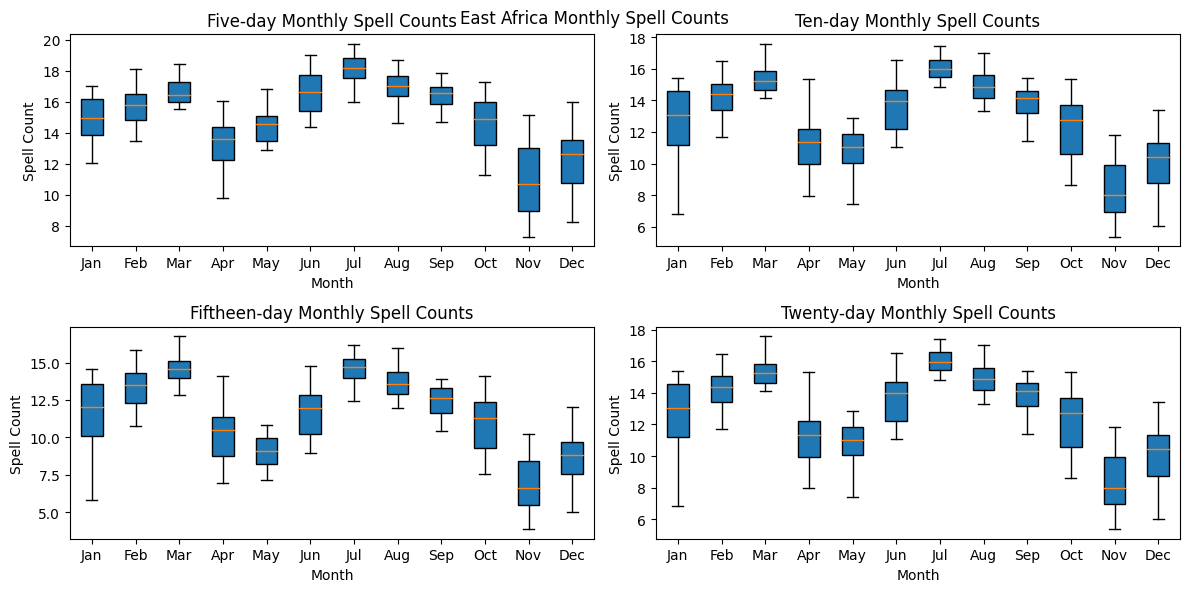

In [100]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot result_5
axes[0,0].boxplot(result_5, showfliers=False, patch_artist=True, labels=month_names)
axes[0,0].set_title('Five-day Monthly Spell Counts')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Spell Count')

# Plot result_10
axes[0,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[0,1].set_title('Ten-day Monthly Spell Counts')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Spell Count')

# Plot result_15
axes[1,0].boxplot(result_15.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,0].set_title('Fiftheen-day Monthly Spell Counts')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Spell Count')

# Plot result_20
axes[1,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,1].set_title('Twenty-day Monthly Spell Counts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Spell Count')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('East Africa Monthly Spell Counts')
#
# Show the plot
#plt.show()

# **Finding the Monthly Average For 5, 10, 15 and 20 day dry spells in North Africa**

In [20]:
import xarray as xr

# Open the input NetCDF file
ds = xr.open_dataset('drive/MyDrive/afonly.nc')

# Select the sub-region of interest
lon_range = slice(-16, 40)  # longitude range from 22ºE to 51ºE
lat_range = slice(19, 37)  # latitude range from 12ºS to 23ºN
subset = ds.sel(lon=lon_range, lat=lat_range)

# Write the subset to a new NetCDF file
subset.to_netcdf('north.nc')

In [21]:
# Open the netCDF file and convert the precipitation data into daily values
ds_data = xr.open_dataset('north.nc')
da_RR = ds_data['pr'].values * 86400
da_RR = xr.DataArray(da_RR, dims=('time', 'lat', 'lon'), coords={'time': ds_data.time, 'lat': ds_data.lat, 'lon': ds_data.lon})

In [22]:
# Define the dry_spell() function and call it
def dry_spell(data, window=5, Rday_thresh=1, dim='time'):
    rolling_sums = data.rolling(time=window).sum()
    dry_day_count = data.where(data < Rday_thresh).rolling(time=window).count()
    spells = data.where((rolling_sums < window*Rday_thresh) & (dry_day_count == window))
    return spells

In [101]:
# Calculate the dry spells for different window sizes
spells_5_north = dry_spell(da_RR, window=5, Rday_thresh=1, dim='time')
spells_10_north = dry_spell(da_RR, window=10, Rday_thresh=1, dim='time')
spells_15_north = dry_spell(da_RR, window=15, Rday_thresh=1, dim='time')
spells_20_north = dry_spell(da_RR, window=20, Rday_thresh=1, dim='time')

In [24]:
%%time
# Count the number of dry spells per year using groupby
spells_5_count = spells_5.groupby('time.year').count(dim='time')
spells_10_count = spells_10.groupby('time.year').count(dim='time')
spells_15_count = spells_15.groupby('time.year').count(dim='time')
spells_20_count = spells_20.groupby('time.year').count(dim='time')

CPU times: user 264 ms, sys: 8.38 ms, total: 272 ms
Wall time: 276 ms


In [102]:
def spell_count_M_North(data):
    spell_count_M_North = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_count_M_North = spell_count_M_North.to_dataframe(name='data')
    spell_count_M_North['Date'] = pd.to_datetime(spell_count_M_North.index.get_level_values('time'))
    spell_count_M_North['Year'] = spell_count_M_North['Date'].dt.year
    spell_count_M_North['Month'] = spell_count_M_North['Date'].dt.month
    spell_count_M_North = spell_count_M_North.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_count_M_North.columns = month_names

    return spell_count_M_North

  # Call the functions with your data
result_5 = spell_count_M_North(spells_5_north)
result_10 = spell_count_M_North(spells_10_north)
result_15 = spell_count_M_North(spells_15_north)
result_20 = spell_count_M_North(spells_20_north)

Text(0.5, 0.98, 'North Africa Monthly Spell Counts')

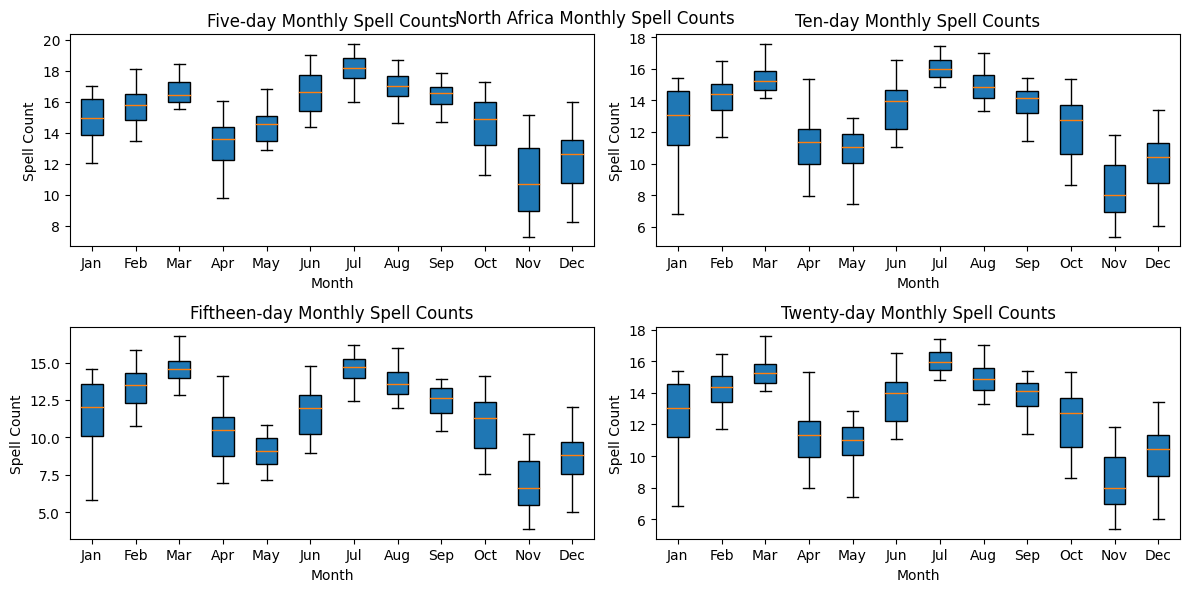

In [103]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot result_5
axes[0,0].boxplot(result_5, showfliers=False, patch_artist=True, labels=month_names)
axes[0,0].set_title('Five-day Monthly Spell Counts')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Spell Count')

# Plot result_10
axes[0,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[0,1].set_title('Ten-day Monthly Spell Counts')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Spell Count')

# Plot result_15
axes[1,0].boxplot(result_15.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,0].set_title('Fiftheen-day Monthly Spell Counts')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Spell Count')

# Plot result_20
axes[1,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,1].set_title('Twenty-day Monthly Spell Counts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Spell Count')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('North Africa Monthly Spell Counts')
#
# Show the plot
#plt.show()

# **Finding the Monthly Average For 5, 10, 15 and 20 day dry spells in Central Africa**


In [27]:
import xarray as xr

# Open the input NetCDF file
ds = xr.open_dataset('drive/MyDrive/afonly.nc')

# Select the sub-region of interest
lon_range = slice(11, 31)  # longitude range from 22ºE to 51ºE
lat_range = slice(-15, 17)  # latitude range from 12ºS to 23ºN
subset = ds.sel(lon=lon_range, lat=lat_range)

# Write the subset to a new NetCDF file
subset.to_netcdf('central.nc')

In [28]:
# Open the netCDF file and convert the precipitation data into daily values
ds_data = xr.open_dataset('central.nc')
da_RR = ds_data['pr'].values * 86400
da_RR = xr.DataArray(da_RR, dims=('time', 'lat', 'lon'), coords={'time': ds_data.time, 'lat': ds_data.lat, 'lon': ds_data.lon})

In [29]:
# Define the dry_spell() function and call it
def dry_spell(data, window=5, Rday_thresh=1, dim='time'):
    rolling_sums = data.rolling(time=window).sum()
    dry_day_count = data.where(data < Rday_thresh).rolling(time=window).count()
    spells = data.where((rolling_sums < window*Rday_thresh) & (dry_day_count == window))
    return spells

In [105]:
# Calculate the dry spells for different window sizes
spells_5_central = dry_spell(da_RR, window=5, Rday_thresh=1, dim='time')
spells_10_central = dry_spell(da_RR, window=10, Rday_thresh=1, dim='time')
spells_15_central = dry_spell(da_RR, window=15, Rday_thresh=1, dim='time')
spells_20_central = dry_spell(da_RR, window=20, Rday_thresh=1, dim='time')

In [31]:
%%time
# Count the number of dry spells per year using groupby
spells_5_count = spells_5.groupby('time.year').count(dim='time')
spells_10_count = spells_10.groupby('time.year').count(dim='time')
spells_15_count = spells_15.groupby('time.year').count(dim='time')
spells_20_count = spells_20.groupby('time.year').count(dim='time')

CPU times: user 216 ms, sys: 6.84 ms, total: 223 ms
Wall time: 232 ms


In [106]:
def spell_count_M_Central(data):
    spell_count_M_Central = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_count_M_Central = spell_count_M_Central.to_dataframe(name='data')
    spell_count_M_Central['Date'] = pd.to_datetime(spell_count_M_Central.index.get_level_values('time'))
    spell_count_M_Central['Year'] = spell_count_M_Central['Date'].dt.year
    spell_count_M_Central['Month'] = spell_count_M_Central['Date'].dt.month
    spell_count_M_Central = spell_count_M_Central.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_count_M_Central.columns = month_names

    return spell_count_M_Central

  # Call the functions with your data
result_5 = spell_count_M_Central(spells_5_central)
result_10 = spell_count_M_Central(spells_10_central)
result_15 = spell_count_M_Central(spells_15_central)
result_20 = spell_count_M_Central(spells_20_central)

Text(0.5, 0.98, 'Central Africa Monthly Spell Counts')

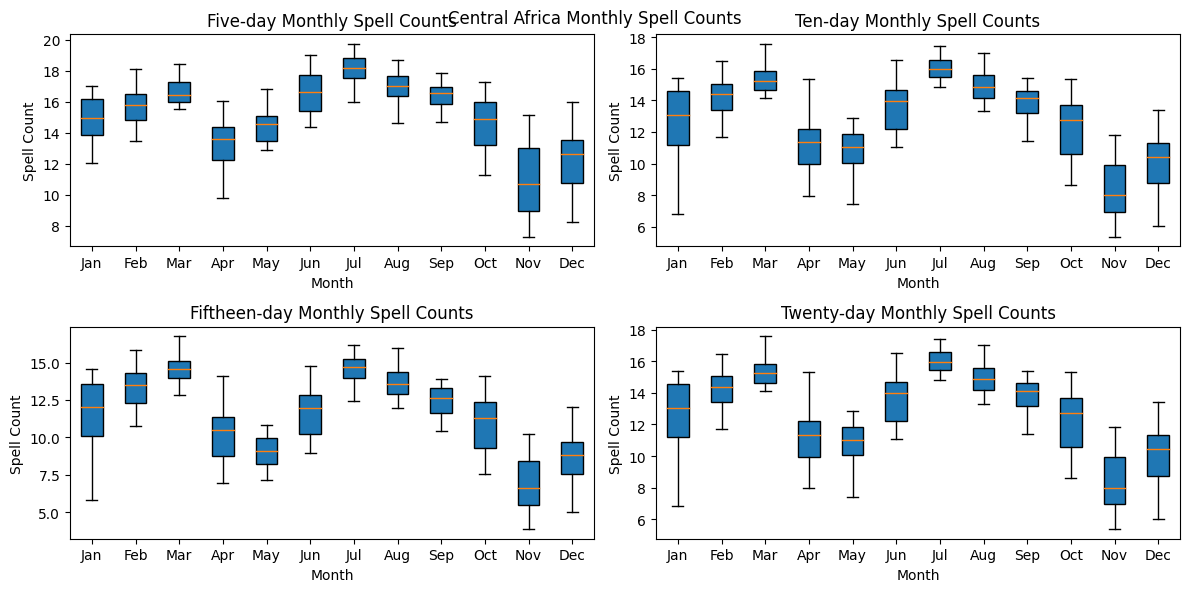

In [107]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot result_5
axes[0,0].boxplot(result_5, showfliers=False, patch_artist=True, labels=month_names)
axes[0,0].set_title('Five-day Monthly Spell Counts')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Spell Count')

# Plot result_10
axes[0,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[0,1].set_title('Ten-day Monthly Spell Counts')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Spell Count')

# Plot result_15
axes[1,0].boxplot(result_15.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,0].set_title('Fiftheen-day Monthly Spell Counts')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Spell Count')

# Plot result_20
axes[1,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,1].set_title('Twenty-day Monthly Spell Counts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Spell Count')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('Central Africa Monthly Spell Counts')
#
# Show the plot
#plt.show()

# **Finding the Monthly Average For 5, 10, 15 and 20 day dry spells in Southern Africa**

In [34]:
import xarray as xr

# Open the input NetCDF file
ds = xr.open_dataset('drive/MyDrive/afonly.nc')

# Select the sub-region of interest
lon_range = slice(12, 41)  # longitude range from 22ºE to 51ºE
lat_range = slice(-34, -14)  # latitude range from 12ºS to 23ºN
subset = ds.sel(lon=lon_range, lat=lat_range)

# Write the subset to a new NetCDF file
subset.to_netcdf('southern.nc')

In [35]:
# Open the netCDF file and convert the precipitation data into daily values
ds_data = xr.open_dataset('southern.nc')
da_RR = ds_data['pr'].values * 86400
da_RR = xr.DataArray(da_RR, dims=('time', 'lat', 'lon'), coords={'time': ds_data.time, 'lat': ds_data.lat, 'lon': ds_data.lon})

In [36]:
# Define the dry_spell() function and call it
def dry_spell(data, window=5, Rday_thresh=1, dim='time'):
    rolling_sums = data.rolling(time=window).sum()
    dry_day_count = data.where(data < Rday_thresh).rolling(time=window).count()
    spells = data.where((rolling_sums < window*Rday_thresh) & (dry_day_count == window))
    return spells

In [109]:
# Calculate the dry spells for different window sizes
spells_5_southern = dry_spell(da_RR, window=5, Rday_thresh=1, dim='time')
spells_10_southern = dry_spell(da_RR, window=10, Rday_thresh=1, dim='time')
spells_15_southern = dry_spell(da_RR, window=15, Rday_thresh=1, dim='time')
spells_20_southern = dry_spell(da_RR, window=20, Rday_thresh=1, dim='time')

In [38]:
%%time
# Count the number of dry spells per year using groupby
spells_5_count = spells_5.groupby('time.year').count(dim='time')
spells_10_count = spells_10.groupby('time.year').count(dim='time')
spells_15_count = spells_15.groupby('time.year').count(dim='time')
spells_20_count = spells_20.groupby('time.year').count(dim='time')

CPU times: user 141 ms, sys: 1 ms, total: 142 ms
Wall time: 145 ms


In [110]:
def spell_count_M_Southern(data):
    spell_count_M_Southern = data.resample(time='1M').count(dim='time').mean(['lon', 'lat'])
    spell_count_M_Southern = spell_count_M_Southern.to_dataframe(name='data')
    spell_count_M_Southern['Date'] = pd.to_datetime(spell_count_M_Southern.index.get_level_values('time'))
    spell_count_M_Southern['Year'] = spell_count_M_Southern['Date'].dt.year
    spell_count_M_Southern['Month'] = spell_count_M_Southern['Date'].dt.month
    spell_count_M_Southern = spell_count_M_Southern.pivot_table(values='data', index='Year', columns='Month')
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    spell_count_M_Southern.columns = month_names

    return spell_count_M_Southern

  # Call the functions with your data
result_5 = spell_count_M_Southern(spells_5_southern)
result_10 = spell_count_M_Southern(spells_10_southern)
result_15 = spell_count_M_Southern(spells_15_southern)
result_20 = spell_count_M_Southern(spells_20_southern)

Text(0.5, 0.98, 'Central Africa Monthly Spell Counts')

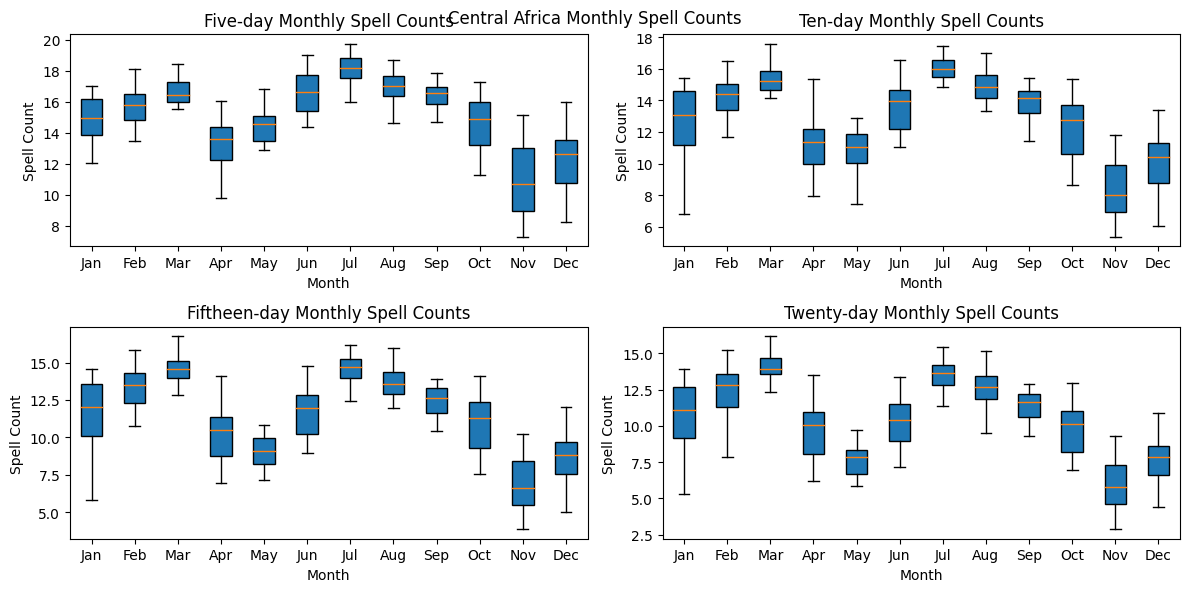

In [111]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot result_5
axes[0,0].boxplot(result_5, showfliers=False, patch_artist=True, labels=month_names)
axes[0,0].set_title('Five-day Monthly Spell Counts')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Spell Count')

# Plot result_10
axes[0,1].boxplot(result_10.values, showfliers=False, patch_artist=True, labels=month_names)
axes[0,1].set_title('Ten-day Monthly Spell Counts')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Spell Count')

# Plot result_15
axes[1,0].boxplot(result_15.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,0].set_title('Fiftheen-day Monthly Spell Counts')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Spell Count')

# Plot result_20
axes[1,1].boxplot(result_20.values, showfliers=False, patch_artist=True, labels=month_names)
axes[1,1].set_title('Twenty-day Monthly Spell Counts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Spell Count')

# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('Central Africa Monthly Spell Counts')
#
# Show the plot
#plt.show()